# Cleaning TUIK Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [76]:
path_to_data = 'data/TUIK'
file_names = os.listdir(path_to_data)
file_names

['consumer_confidence_index.csv',
 'consumer_price_index.csv',
 'export_import.xlsx',
 'export_import1.xls',
 'export_import2.xls',
 'export_import3.xls',
 'export_import4.xls',
 'export_unit_value_index.csv',
 'gdp_expenditure.csv',
 'gdp_income.csv',
 'gdp_production.csv',
 'import_unit_value_index.csv',
 'industrial_production_index1.csv',
 'industrial_production_index2.csv',
 'unemployment1.xls',
 'unemployment2.csv']

### Export-Import data

In [56]:
file_name = 'export_import.xlsx'
path = os.path.join(path_to_data, file_name)
df = pd.read_excel(path)

In [57]:
df = df.dropna(how='all')

# Renaming columns
df = df.rename(columns={'Yıl': 'year', 'Ay': 'month', 'İhracat Dolar': 'exports_usd',
           'İhracat TL/YTL': 'exports_tl', 'İthalat Dolar': 'imports_usd', 'İthalat TL/YTL': 'imports_tl'})

# Filling empty year values
df['year'] = df['year'].fillna(method='ffill').astype('int')

# Dropping "Toplam" rows
cond = df['month'].astype('str').str.isnumeric()
df = df.loc[cond]
df['month'] = df['month'].astype('int').copy()

# Removing period from numeric columns and converting to int 
cols = ['exports_usd', 'exports_tl', 'imports_usd', 'imports_tl']

for col in cols:
    df[col] = df[col].str.replace('.', '', regex=False)
    df[col] = df[col].astype('int64')

In [67]:
# Saving to cleaned_data
df.to_csv('cleaned_data/export_import.csv', index=False)

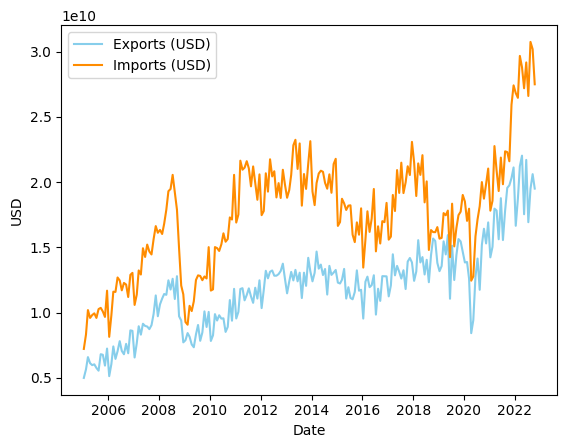

In [75]:
df['day'] = 15
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

plt.plot('date', 'exports_usd', data=df, color='skyblue', label='Exports (USD)')
plt.plot('date', 'imports_usd', data=df, color='darkorange', label='Imports (USD)')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()